# Projeto

## Data Preparation

### 3 Alternativas (atleast 2):
1. Eliminate Columns & Rows bove certain Threshold
- **1.1** Eliminate Columns with percentage(%) of Missing Values above 15% 'Credit_Mix' && 'Monthly_Inhand_Salary'
- **1.2** Eliminate Rows with percentage(%) of Missing Values above 16%
- **1.3** Fill Missing Values using Mean for Numerics and Most-frequent to Symbolic

2. Filling Missing Values (median & most_frequent)

3. Don´t eliminate any Columns or Rows (knnimputer)

In [3]:
import pandas as pd
from matplotlib.pyplot import figure, show
from sklearn.impute import SimpleImputer
import dslabs_functions as dslabs
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import savefig
from sklearn.impute import KNNImputer

filename = 'data_preparation_csvs/enconding_csvs/data_encoded.csv'
data_encoded: pd.DataFrame = pd.read_csv(filename, index_col='ID', sep=',', decimal='.', na_values='')
print(f"Dataset nr records={data_encoded.shape[0]}", f"nr variables={data_encoded.shape[1]}")
##print(data_encoded.dtypes)

most_frequent = ['Month', 'Occupation', 'Payment_of_Min_Amount', 'Credit_Mix', 'Monthly_Inhand_Salary'
                 , 'Payment_Behaviour', 'Payday Loan', 'Personal Loan', 'Debt Consolidation Loan'
                 , 'Auto Loan', 'Not Specified Loan', 'Student Loan', 'Credit-Builder Loan'
                 , 'Mortgage Loan', 'Home Equity Loan', 'Credit_Score']

## Strategies to be used
imputer_mean = SimpleImputer(strategy='mean')
imputer_mode = SimpleImputer(strategy='most_frequent')
imputer_median = SimpleImputer(strategy='median')


Dataset nr records=100000 nr variables=32


### Missing Values Imputation

  File "c:\Users\franc\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


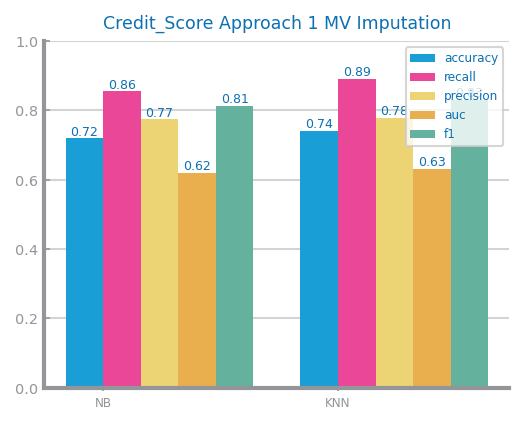

In [4]:
# Alternativa 1

## 1.1 && 1.2
data_mv_alt1: pd.DataFrame = dslabs.mvi_by_dropping(data_encoded, min_pct_per_variable=0.85, min_pct_per_record=0.84)
# Define the columns that will be imputed with the most frequent value
most_frequent_alt1 = ['Month', 'Occupation', 'Payment_of_Min_Amount'
                 , 'Payment_Behaviour', 'Payday Loan', 'Personal Loan', 'Debt Consolidation Loan'
                 , 'Auto Loan', 'Not Specified Loan', 'Student Loan', 'Credit-Builder Loan'
                 , 'Mortgage Loan', 'Home Equity Loan', 'Credit_Score']

## 1.3
mv_alt1_mode = data_mv_alt1[most_frequent_alt1]
mv_alt2_mean = data_mv_alt1.drop(columns=most_frequent_alt1)

mode_imputed = pd.DataFrame(imputer_mode.fit_transform(mv_alt1_mode), columns=mv_alt1_mode.columns)
mean_imputed = pd.DataFrame(imputer_mean.fit_transform(mv_alt2_mean), columns=mv_alt2_mean.columns)

data_mv_alt1 = pd.concat([mode_imputed, mean_imputed], axis=1)

# negative_value_counts = (data_mv_alt1 < 0).sum()
# print(negative_value_counts)

data_mv_alt1.to_csv('data_preparation_csvs/mv_imputation_csvs/data_mv_alt1.csv', index=False)

## Separate into Train and Test and save in different files
train_data, test_data = train_test_split(data_mv_alt1, test_size=0.2, random_state=42)

## Save the training and testing sets to CSV files
train_data.to_csv('data_preparation_csvs/mv_imputation_csvs/train_data_mv_alt1.csv', index=False)
test_data.to_csv('data_preparation_csvs/mv_imputation_csvs/test_data_mv_alt1.csv', index=False)

## Evaluate Approach
file_tag = "Credit_Score"
target = "Credit_Score"

figure()
eval: dict[str, list] = dslabs.evaluate_approach(train_data, test_data, target=target, metric="recall")
dslabs.plot_multibar_chart(
    ["NB", "KNN"], eval, title=f"{file_tag} Approach 1 MV Imputation", percentage=True
)
savefig(f"data_preparation_images/missing_values_imputation_result/data_mv_alt1.png")
show()

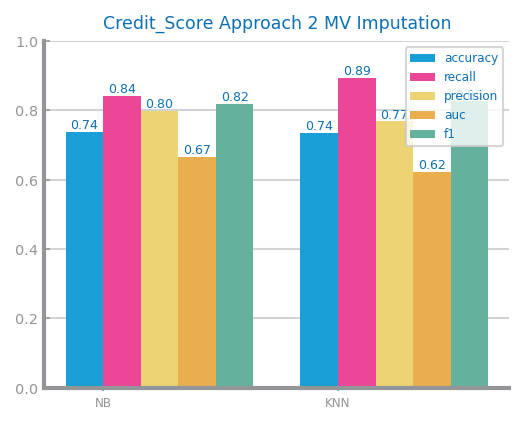

In [5]:
# Alternativa 2
data_mv_alt2 = data_encoded.copy()
# Define the columns that will be imputed with the most frequent value
most_frequent_alt2 = ['Month', 'Occupation', 'Payment_of_Min_Amount', 'CreditMix'
                 , 'Payment_Behaviour', 'Payday Loan', 'Personal Loan', 'Debt Consolidation Loan'
                 , 'Auto Loan', 'Not Specified Loan', 'Student Loan', 'Credit-Builder Loan'
                 , 'Mortgage Loan', 'Home Equity Loan', 'Credit_Score']

## 1.3
mv_alt2_mode = data_mv_alt2[most_frequent_alt2]
mv_alt2_median = data_mv_alt2.drop(columns=most_frequent_alt2)

mode_imputed2 = pd.DataFrame(imputer_mode.fit_transform(mv_alt2_mode), columns=mv_alt2_mode.columns)
median_imputed2 = pd.DataFrame(imputer_median.fit_transform(mv_alt2_median), columns=mv_alt2_median.columns)

data_mv_alt2 = pd.concat([mode_imputed2, median_imputed2], axis=1)

# negative_value_counts = (data_mv_alt1 < 0).sum()
# print(negative_value_counts)

data_mv_alt2.to_csv('data_preparation_csvs/mv_imputation_csvs/data_mv_alt2.csv', index=False)

## Separate into Train and Test and save in different files
train_data2, test_data2 = train_test_split(data_mv_alt2, test_size=0.2, random_state=42)

## Save the training and testing sets to CSV files
train_data2.to_csv('data_preparation_csvs/mv_imputation_csvs/train_data_mv_alt2.csv', index=False)
test_data2.to_csv('data_preparation_csvs/mv_imputation_csvs/test_data_mv_alt2.csv', index=False)

## Evaluate Approach
file_tag = "Credit_Score"
target = "Credit_Score"

figure()
eval: dict[str, list] = dslabs.evaluate_approach(train_data2, test_data2, target=target, metric="recall")
dslabs.plot_multibar_chart(
    ["NB", "KNN"], eval, title=f"{file_tag} Approach 2 MV Imputation", percentage=True
)
savefig(f"data_preparation_images/missing_values_imputation_result/data_mv_alt2.png")
show()

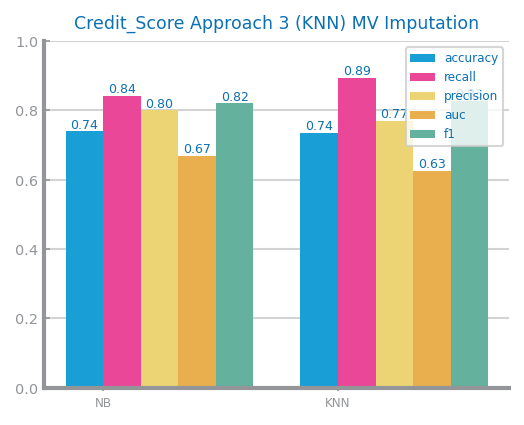

In [6]:
# Alternativa 3

imputer_knn = KNNImputer(n_neighbors=5)
data_mv_alt3 = imputer_knn.fit_transform(data_encoded)
data_mv_alt3 = pd.DataFrame(data_mv_alt3, columns=data_encoded.columns)

data_mv_alt3.to_csv('data_preparation_csvs/mv_imputation_csvs/data_mv_alt3.csv', index=False)

## Separate into Train and Test and save in different files
train_data3, test_data3 = train_test_split(data_mv_alt3, test_size=0.2, random_state=42)

## Save the training and testing sets to CSV files
train_data3.to_csv('data_preparation_csvs/mv_imputation_csvs/train_data_mv_alt3.csv', index=False)
test_data3.to_csv('data_preparation_csvs/mv_imputation_csvs/test_data_mv_alt3.csv', index=False)

## Evaluate Approach
file_tag = "Credit_Score"
target = "Credit_Score"

figure()
eval: dict[str, list] = dslabs.evaluate_approach(train_data3, test_data3, target=target, metric="recall")
dslabs.plot_multibar_chart(
    ["NB", "KNN"], eval, title=f"{file_tag} Approach 3 (KNN) MV Imputation", percentage=True
)
savefig(f"data_preparation_images/missing_values_imputation_result/data_mv_alt3.png")
show()


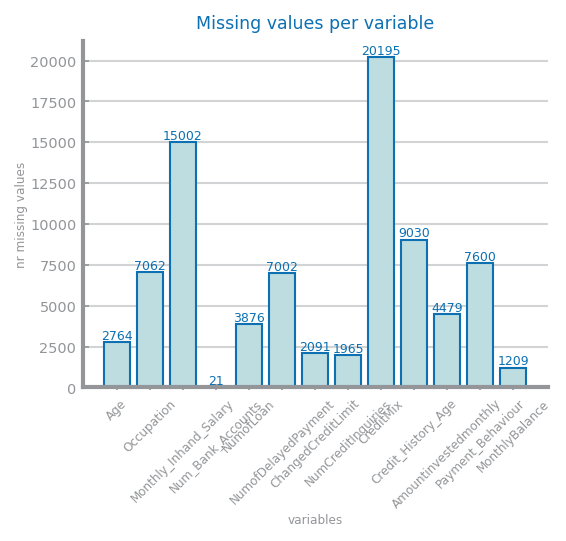

In [7]:
mv: dict[str, int] = {}
figure()
for var in data_encoded:
    nr: int = data_encoded[var].isna().sum()
    if nr > 0:
        mv[var] = nr

## Check if any record as all variables missing
all_record_missing: pd.DataFrame = data_encoded.dropna(how="any", inplace=False)
all_record_missing.shape

dslabs.plot_bar_chart(
    list(mv.keys()),
    list(mv.values()),
    title="Missing values per variable",
    xlabel="variables",
    ylabel="nr missing values",
)
show()

In [8]:
missing_percentages = data_encoded.isnull().mean() * 100
print(missing_percentages)

Month                       0.000
Age                         2.764
Occupation                  7.062
Annual_Income               0.000
Monthly_Inhand_Salary      15.002
Num_Bank_Accounts           0.021
Num_Credit_Card             0.000
Interest_Rate               0.000
NumofLoan                   3.876
Delay_from_due_date         0.000
NumofDelayedPayment         7.002
ChangedCreditLimit          2.091
NumCreditInquiries          1.965
CreditMix                  20.195
OutstandingDebt             0.000
CreditUtilizationRatio      0.000
Credit_History_Age          9.030
Payment_of_Min_Amount       0.000
TotalEMIpermonth            0.000
Amountinvestedmonthly       4.479
Payment_Behaviour           7.600
MonthlyBalance              1.209
Credit-Builder Loan         0.000
Home Equity Loan            0.000
Personal Loan               0.000
Debt Consolidation Loan     0.000
Not Specified Loan          0.000
Auto Loan                   0.000
Payday Loan                 0.000
Student Loan  

In [9]:
missing_percentages_rows = data_encoded.isnull().mean(axis=1) * 100
top_20_missing = missing_percentages_rows.sort_values(ascending=False).head(30)
print(top_20_missing)


ID
0x7a22     18.750
0x17d3a    18.750
0x19d00    18.750
0x1d3c5    18.750
0x4430     15.625
0x14b58    15.625
0x6f2a     15.625
0x247a0    15.625
0xc9a3     15.625
0x3d29     15.625
0x1a079    15.625
0x5d19     15.625
0x1dec3    15.625
0x1210e    15.625
0x6262     15.625
0x1cfea    15.625
0x13225    15.625
0xf142     15.625
0xbaef     15.625
0x2273c    15.625
0x15990    15.625
0xa47c     15.625
0xe1d4     15.625
0x13e61    15.625
0x18246    15.625
0x25155    15.625
0xb13a     15.625
0xd0f6     15.625
0xb7e3     15.625
0x1db09    15.625
dtype: float64


### Filling Missing Values

- mean, median for numeric variables, most_frequent to symbolic